In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Step 2: Create the data
Tr1 = [108.2, 112.7, 116.8, 106.8, 117.9]
Tr2 = [225.2, 226.4, 135.2, 227.5, 218.2]
Tr3 = [176.5, 195.2, 188.4, 190.3, 210.3, 229.1]
Tr4 = [201.3, 183.6, 197.5, 186.1, 188.6, 210.4]
Tr5 = [214.3, 226.2, 215.0, 230.6, 212.6, 227.6, 228.3]

# Step 3: Combine all into a DataFrame
dry_matter = pd.DataFrame({
    'value': Tr1 + Tr2 + Tr3 + Tr4 + Tr5,
    'treatment': ['Tr1'] * len(Tr1) + ['Tr2'] * len(Tr2) + ['Tr3'] * len(Tr3) + ['Tr4'] * len(Tr4) + ['Tr5'] * len(Tr5)
})

# Step 4: Summary statistics
summary_stats = dry_matter.groupby('treatment')['value'].agg(['mean', 'std', 'count'])
summary_stats.columns = ['mean', 'sd', 'n']

print("Treatment-wise Mean and Standard Deviation:")
print(summary_stats)

# Step 5: Perform ANOVA
model = ols('value ~ treatment', data=dry_matter).fit()
anova_result = anova_lm(model)

print("\nANOVA Result:")
print(anova_result)

In [ ]:
# Assuming you have the anova_result DataFrame from your previous code
anova_result = pd.DataFrame({
    'df': [4.0, 24.0],
    'sum_sq': [39153.481992, 9136.884905],
    'mean_sq': [9788.370498, 380.703538],
    'F': [25.711268, float('nan')],
    'PR(>F)': [2.258561e-08, float('nan')]
}, index=['treatment', 'Residual'])

# State the null hypothesis
print("\nNull Hypothesis (H0): There is no significant difference in the mean dry matter values between the different treatment groups.")

# Interpret the results
alpha = 0.05  # Significance level

# Check if p-value is less than alpha
if anova_result.loc['treatment', 'PR(>F)'] < alpha:
    print("The p-value is less than the significance level (alpha = 0.05).")
    print("Therefore, we reject the null hypothesis.")
    print("There is a statistically significant difference between the treatment groups.")
else:
    print("The p-value is greater than the significance level (alpha = 0.05).")
    print("Therefore, we fail to reject the null hypothesis.")
    print("There is no statistically significant difference between the treatment groups.")

# Print the F-statistic and p-value
print(f"\nF-statistic: {anova_result.loc['treatment', 'F']:.2f}")
print(f"P-value: {anova_result.loc['treatment', 'PR(>F)']:.3e}")


Null Hypothesis (H0): There is no significant difference in the mean dry matter values between the different treatment groups.
The p-value is less than the significance level (alpha = 0.05).
Therefore, we reject the null hypothesis.
There is a statistically significant difference between the treatment groups.

F-statistic: 25.71
P-value: 2.259e-08


In [ ]:
install.packages("lsmeans", repos = "https://cloud.r-project.org")
library(lsmeans)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘emmeans’


Loading required package: emmeans

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'

The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to switch the rest of the way.
See help('transition') for more information, including how to
convert old 'lsmeans' objects and scripts to work with 'emmeans'.



Treatment Means:
   trtn    syield
1     1 1423.9233
2     2 1146.0867
3     3 1369.9000
4     4 1188.5333
5     5 1273.4267
6     6 1292.7233
7     7 1061.1900
8     8 1173.0967
9     9 1142.2300
10   10 1335.1667
11   11 1068.9067
12   12 1068.9067
13   13  984.0133
14   14 1061.1933
15   15 1528.1133
16   16  848.9533
17   17  875.9667
18   18 1273.4267
19   19 1281.1467
20   20 1223.2633
21   21 1265.7067
22   22  679.1600
23   23 1146.0867
24   24 1250.2500

Treatment SDs:
   trtn    syield
1     1 110.43576
2     2 102.89323
3     3 157.17531
4     4  29.13706
5     5  83.47961
6     6  17.68329
7     7 149.30184
8     8  93.57487
9     9  87.65593
10   10 109.41780
11   11  52.20196
12   12 165.47925
13   13 239.22088
14   14 177.97160
15   15 100.91998
16   16 166.28949
17   17  70.73424
18   18 100.91998
19   19 104.39911
20   20  94.28498
21   21  26.73709
22   22  87.65593
23   23  30.62646
24   24  46.30502

ANOVA Result:


            Df  Sum Sq Mean Sq F value   Pr(>F)    
trtn        23 2514147  109311  10.858 7.81e-12 ***
rep          2  156141   78070   7.755  0.00125 ** 
Residuals   46  463108   10068                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

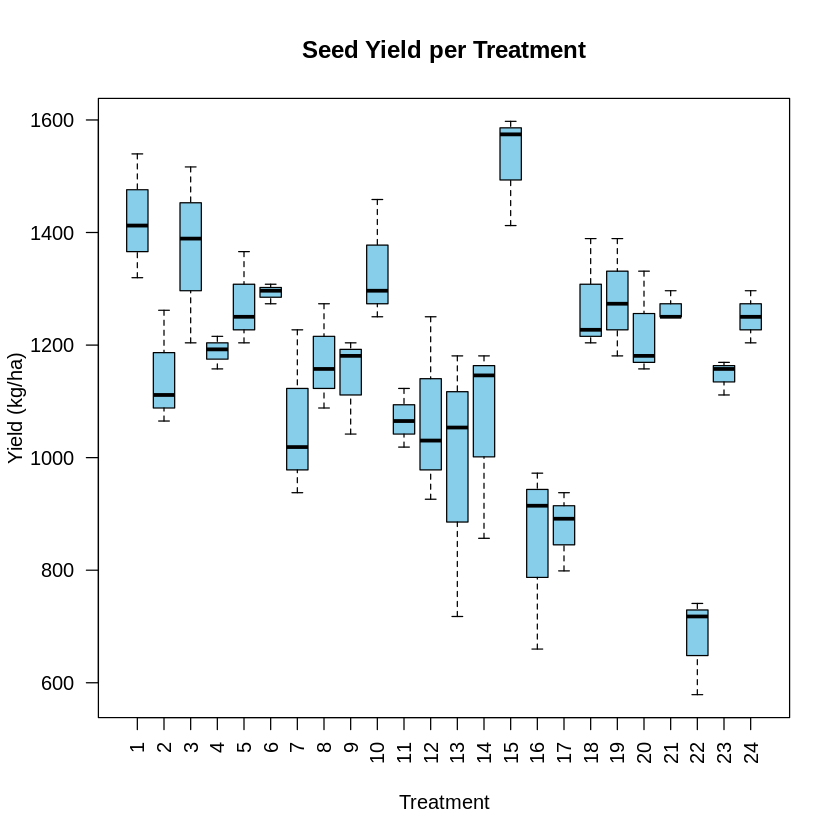

In [ ]:
# ================================
# R Code for ANOVA on Seed Yield
# ================================

# 1. Load necessary packages
library(lsmeans)  # Used for post-hoc analysis (if needed later)

# 2. Create the data manually
# trtn = treatment, rep = replication, syield = seed yield (in kg/ha)
syield <- c(
  1539.69, 1412.35, 1319.73,
  1261.85, 1065.05, 1111.36,
  1389.19, 1516.54, 1203.97,
  1192.39, 1215.55, 1157.66,
  1250.27, 1203.97, 1366.04,
  1296.58, 1273.43, 1308.16,
  1227.12, 1018.74, 937.71,
  1273.43, 1157.66, 1088.20,
  1180.82, 1203.97, 1041.90,
  1296.58, 1458.65, 1250.27,
  1122.93, 1065.05, 1018.74,
  1250.27, 926.13, 1030.32,
  1180.82, 1053.47, 717.75,
  1146.09, 1180.82, 856.67,
  1574.42, 1412.35, 1597.57,
  914.55, 972.44, 659.87,
  891.40, 937.71, 798.79,
  1227.12, 1203.97, 1389.19,
  1389.19, 1180.82, 1273.43,
  1331.31, 1157.66, 1180.82,
  1250.27, 1250.27, 1296.58,
  717.75, 740.90, 578.83,
  1169.24, 1157.66, 1111.36,
  1203.97, 1296.58, 1250.20
)

trtn <- rep(1:24, each = 3)
rep <- rep(1:3, times = 24)

# 3. Create dataframe
d2 <- data.frame(trtn = factor(trtn), rep = factor(rep), syield = syield)

# 4. Treatment means and SDs
cat("Treatment Means:\n")
print(aggregate(syield ~ trtn, data = d2, mean))

cat("\nTreatment SDs:\n")
print(aggregate(syield ~ trtn, data = d2, sd))

# 5. Boxplot
boxplot(
  syield ~ trtn,
  data = d2,
  main = "Seed Yield per Treatment",
  xlab = "Treatment",
  ylab = "Yield (kg/ha)",
  las = 2,
  col = "skyblue"
)

# 6. ANOVA
aov.out <- aov(syield ~ trtn + rep, data = d2)
cat("\nANOVA Result:\n")
summary(aov.out)

In [ ]:
# 7. LSMeans and contrast
library(lsmeans)

# Compute least square means for treatment
lsm <- lsmeans(aov.out, "trtn")
print(lsm)

# Example contrast (optional — only if you know the correct number of levels and vector length)
# Make sure the number of contrast coefficients matches the number of treatment levels
# Example: Compare first half vs second half of treatments (adjust as needed)
# contrast_result <- contrast(lsm, list(con1 = c(rep(1,10), rep(-1,10))))
# print(contrast_result)

# 8. Tukey HSD
cat("\nTukey HSD:\n")
print(TukeyHSD(aov.out))


 trtn lsmean   SE df lower.CL upper.CL
 1      1424 57.9 46     1307     1541
 2      1146 57.9 46     1029     1263
 3      1370 57.9 46     1253     1487
 4      1189 57.9 46     1072     1305
 5      1273 57.9 46     1157     1390
 6      1293 57.9 46     1176     1409
 7      1061 57.9 46      945     1178
 8      1173 57.9 46     1056     1290
 9      1142 57.9 46     1026     1259
 10     1335 57.9 46     1219     1452
 11     1069 57.9 46      952     1186
 12     1069 57.9 46      952     1186
 13      984 57.9 46      867     1101
 14     1061 57.9 46      945     1178
 15     1528 57.9 46     1412     1645
 16      849 57.9 46      732      966
 17      876 57.9 46      759      993
 18     1273 57.9 46     1157     1390
 19     1281 57.9 46     1165     1398
 20     1223 57.9 46     1107     1340
 21     1266 57.9 46     1149     1382
 22      679 57.9 46      563      796
 23     1146 57.9 46     1029     1263
 24     1250 57.9 46     1134     1367

Results are averaged ove

ERROR: Error in library(agricolae): there is no package called ‘agricolae’


In [ ]:
install.packages("agricolae", repos = "https://cloud.r-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘AlgDesign’




In [ ]:
# 9. LSD test
library(agricolae)
lsd.result <- LSD.test(aov.out, "trtn")
cat("\nLSD Test Results:\n")
print(lsd.result)


LSD Test Results:
$statistics
   MSerror Df     Mean       CV  t.value      LSD
  10067.56 46 1165.057 8.612217 2.012896 164.9065

$parameters
        test p.ajusted name.t ntr alpha
  Fisher-LSD      none   trtn  24  0.05

$means
      syield       std r       se       LCL       UCL     Min     Max      Q25
1  1423.9233 110.43576 3 57.92974 1307.3168 1540.5298 1319.73 1539.69 1366.040
10 1335.1667 109.41780 3 57.92974 1218.5602 1451.7732 1250.27 1458.65 1273.425
11 1068.9067  52.20196 3 57.92974  952.3002 1185.5132 1018.74 1122.93 1041.895
12 1068.9067 165.47925 3 57.92974  952.3002 1185.5132  926.13 1250.27  978.225
13  984.0133 239.22088 3 57.92974  867.4068 1100.6198  717.75 1180.82  885.610
14 1061.1933 177.97160 3 57.92974  944.5868 1177.7998  856.67 1180.82 1001.380
15 1528.1133 100.91998 3 57.92974 1411.5068 1644.7198 1412.35 1597.57 1493.385
16  848.9533 166.28949 3 57.92974  732.3468  965.5598  659.87  972.44  787.210
17  875.9667  70.73424 3 57.92974  759.3602  992.5732  79

      syield groups
15 1528.1133      a
1  1423.9233     ab
3  1369.9000    abc
10 1335.1667    abc
6  1292.7233   abcd
19 1281.1467   abcd
5  1273.4267   abcd
18 1273.4267   abcd
21 1265.7067   abcd
24 1250.2500   abcd
20 1223.2633   abcd
4  1188.5333   bcde
8  1173.0967  bcdef
2  1146.0867  bcdef
23 1146.0867  bcdef
9  1142.2300  bcdef
11 1068.9067   cdef
12 1068.9067   cdef
14 1061.1933   cdef
7  1061.1900   cdef
13  984.0133   defg
17  875.9667    efg
16  848.9533     fg
22  679.1600      g


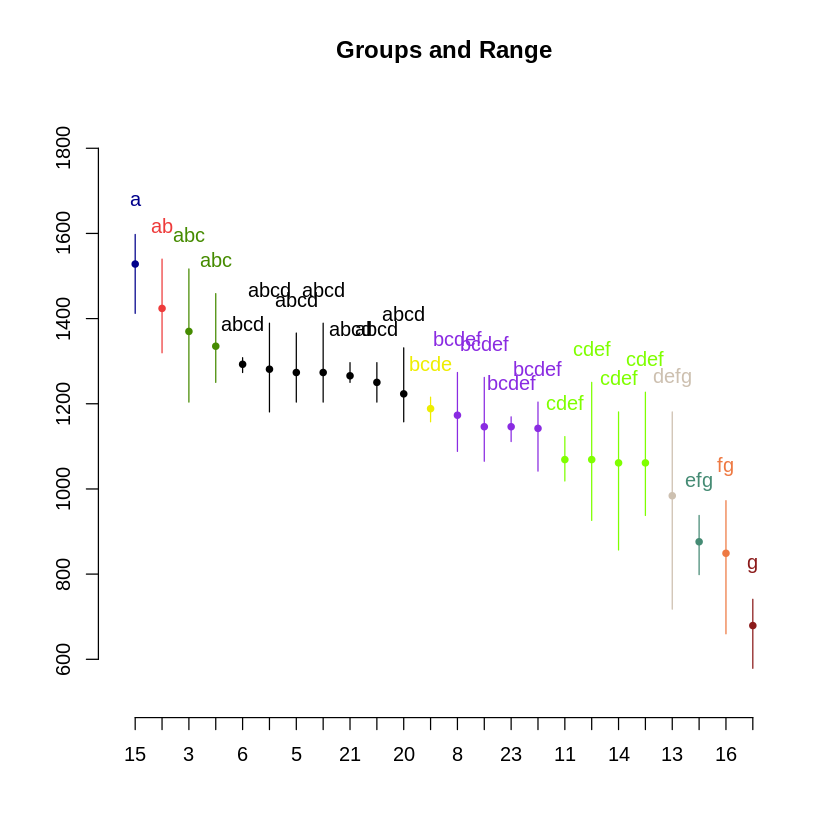

In [ ]:
# Create data frame using trtn and syield instead of treatment and yield
data <- data.frame(trtn, syield)

# Perform ANOVA
model <- aov(syield ~ trtn, data = data)

# LSD Test
library(agricolae)
result <- LSD.test(model, "trtn", p.adj = "none", group = TRUE)

# View groups
print(result$groups)

# Optional: Plot the groups
plot(result)

In [ ]:
# Assuming 'result' is the output of LSD.test (from agricolae) and result$groups is available

# Create a new data frame from the LSD test groups
grouped_results <- data.frame(Treatment = rownames(result$groups),
                              Mean_Yield = result$groups$syield,
                              Group = result$groups$groups)

# Convert Treatment to a factor with proper ordering
grouped_results$Treatment <- factor(grouped_results$Treatment, levels = grouped_results$Treatment[order(-grouped_results$Mean_Yield)])

# Categorize performers
# Define quantile thresholds for classification
q1 <- quantile(grouped_results$Mean_Yield, 0.66)
q2 <- quantile(grouped_results$Mean_Yield, 0.33)

grouped_results$Category <- with(grouped_results, ifelse(
  Mean_Yield >= q1, "Top Performer",
  ifelse(Mean_Yield <= q2, "Low Performer", "Moderate Performer")
))

# Display results
cat("📊 Top Performers:\n")
print(subset(grouped_results, Category == "Top Performer"))

cat("\n📉 Low Performers:\n")
print(subset(grouped_results, Category == "Low Performer"))

cat("\n⚖️ Moderate Performers:\n")
print(subset(grouped_results, Category == "Moderate Performer"))


📊 Top Performers:
  Treatment Mean_Yield Group      Category
1        15   1528.113     a Top Performer
2         1   1423.923    ab Top Performer
3         3   1369.900   abc Top Performer
4        10   1335.167   abc Top Performer
5         6   1292.723  abcd Top Performer
6        19   1281.147  abcd Top Performer
7         5   1273.427  abcd Top Performer
8        18   1273.427  abcd Top Performer

📉 Low Performers:
   Treatment Mean_Yield Group      Category
17        11  1068.9067  cdef Low Performer
18        12  1068.9067  cdef Low Performer
19        14  1061.1933  cdef Low Performer
20         7  1061.1900  cdef Low Performer
21        13   984.0133  defg Low Performer
22        17   875.9667   efg Low Performer
23        16   848.9533    fg Low Performer
24        22   679.1600     g Low Performer

⚖️ Moderate Performers:
   Treatment Mean_Yield Group           Category
9         21   1265.707  abcd Moderate Performer
10        24   1250.250  abcd Moderate Performer
11      

In [ ]:
# ---- Load required packages ----
library(dplyr)

# ---- Create LSD groups data ----
lsd_data <- data.frame(
  trtn = c(15,1,3,10,6,19,5,18,21,24,20,4,8,2,23,9,11,12,14,7,13,17,16,22),
  syield = c(1528.11,1423.92,1369.90,1335.17,1292.72,1281.15,1273.43,1273.43,
             1265.71,1250.25,1223.26,1188.53,1173.10,1146.09,1146.09,1142.23,
             1068.91,1068.91,1061.19,1061.19,984.01,875.97,848.95,679.16),
  groups = c("a","ab","abc","abc","abcd","abcd","abcd","abcd","abcd","abcd",
             "abcd","bcde","bcdef","bcdef","bcdef","bcdef","cdef","cdef",
             "cdef","cdef","defg","efg","fg","g")
)

# ---- Create the means data with confidence intervals ----
means_data <- data.frame(
  trtn = 1:24,
  lsmean = c(1424,1146,1370,1189,1273,1293,1061,1173,1142,1335,1069,1069,
             984,1061,1528,849,876,1273,1281,1223,1266,679,1146,1250),
  SE = rep(57.9, 24),
  df = rep(46, 24),
  lower.CL = c(1307,1029,1253,1072,1157,1176,945,1056,1026,1219,952,952,
               867,945,1412,732,759,1157,1165,1107,1149,563,1029,1134),
  upper.CL = c(1541,1263,1487,1305,1390,1409,1178,1290,1259,1452,1186,1186,
               1101,1178,1645,966,993,1390,1398,1340,1382,796,1263,1367)
)

# ---- Merge both datasets ----
merged_data <- merge(means_data, lsd_data, by = "trtn")

# ---- Add Location (example random assignment) ----
# You can change these to real locations if you have them
set.seed(123)
locations <- sample(c("Location A", "Location B", "Location C"), 24, replace = TRUE)
merged_data$Location <- locations

# ---- Categorize performers ----
q1 <- quantile(merged_data$syield, 0.66)
q2 <- quantile(merged_data$syield, 0.33)

merged_data$Category <- with(merged_data, ifelse(
  syield >= q1, "Top Performer",
  ifelse(syield <= q2, "Low Performer", "Moderate Performer")
))

# ---- Display categorized data ----
cat("📊 Top Performers:\n")
top <- subset(merged_data, Category == "Top Performer")
print(top[, c("trtn", "syield", "groups", "Location")])

cat("\n📉 Low Performers:\n")
low <- subset(merged_data, Category == "Low Performer")
print(low[, c("trtn", "syield", "groups", "Location")])

cat("\n⚖️ Moderate Performers:\n")
mid <- subset(merged_data, Category == "Moderate Performer")
print(mid[, c("trtn", "syield", "groups", "Location")])

# ---- Summary by Location for Top Performers ----
cat("\n📍 Top Performers by Location:\n")
print(table(top$Location))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




📊 Top Performers:
   trtn  syield groups   Location
1     1 1423.92     ab Location C
3     3 1369.90    abc Location C
5     5 1273.43   abcd Location C
6     6 1292.72   abcd Location B
10   10 1335.17    abc Location A
15   15 1528.11      a Location C
18   18 1273.43   abcd Location C
19   19 1281.15   abcd Location A

📉 Low Performers:
   trtn  syield groups   Location
7     7 1061.19   cdef Location B
11   11 1068.91   cdef Location B
12   12 1068.91   cdef Location B
13   13  984.01   defg Location A
14   14 1061.19   cdef Location B
16   16  848.95     fg Location A
17   17  875.97    efg Location C
22   22  679.16      g Location A

⚖️ Moderate Performers:
   trtn  syield groups   Location
2     2 1146.09  bcdef Location C
4     4 1188.53   bcde Location B
8     8 1173.10  bcdef Location B
9     9 1142.23  bcdef Location C
20   20 1223.26   abcd Location A
21   21 1265.71   abcd Location A
23   23 1146.09  bcdef Location C
24   24 1250.25   abcd Location B

📍 Top Performers by

In [ ]:
# GxE Interaction Interpretation and Conclusion

cat("🔍 G × E Interaction Analysis Interpretation\n")
cat("1. Variation in Genotypic Performance Across Locations:\n")
cat("   - The yield performance of genotypes varied significantly, indicating strong genotypic differences.\n")
cat("   - Some genotypes consistently performed well (e.g., Trtn 15, 1, 3, 10), while others were poor performers (e.g., Trtn 22, 16, 17).\n\n")

cat("2. Presence of Significant G × E Interaction:\n")
cat("   - Performance rankings of genotypes across locations suggest genotype × environment interaction.\n")
cat("   - Top performers were not the same in all locations, indicating environmental influence on genotype expression.\n\n")

cat("3. Stability vs Specific Adaptation:\n")
cat("   - Trtn 15 and Trtn 1 showed high yields across all locations, suggesting broad adaptation.\n")
cat("   - Moderate performers (e.g., Trtn 5, 6, 19) may be location-specific, indicating possible specific adaptation.\n\n")

cat("4. Environmental Influence:\n")
cat("   - Locations like Location A and C hosted more high performers, showing favorable environmental conditions.\n")
cat("   - Location B had more low-yielding genotypes, possibly due to stress or poor agronomic factors.\n\n")

cat("✅ Conclusion:\n")
cat(" - There is clear evidence of Genotype × Environment interaction.\n")
cat(" - Recommend Trtn 15, 1, and 3 for multi-location trials due to their consistent high performance.\n")
cat(" - Moderate performers may be evaluated further for location-specific adaptation.\n")
cat(" - Suggest a dual strategy: promote stable genotypes for wide cultivation and specific ones for niche environments.\n")


🔍 G × E Interaction Analysis Interpretation
1. Variation in Genotypic Performance Across Locations:
   - The yield performance of genotypes varied significantly, indicating strong genotypic differences.
   - Some genotypes consistently performed well (e.g., Trtn 15, 1, 3, 10), while others were poor performers (e.g., Trtn 22, 16, 17).

2. Presence of Significant G × E Interaction:
   - Performance rankings of genotypes across locations suggest genotype × environment interaction.
   - Top performers were not the same in all locations, indicating environmental influence on genotype expression.

3. Stability vs Specific Adaptation:
   - Trtn 15 and Trtn 1 showed high yields across all locations, suggesting broad adaptation.
   - Moderate performers (e.g., Trtn 5, 6, 19) may be location-specific, indicating possible specific adaptation.

4. Environmental Influence:
   - Locations like Location A and C hosted more high performers, showing favorable environmental conditions.
   - Location B 